In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Read csv file 
quarterly_income = "data/quarterly_inc.csv"
quarterly_expenditure = "data/quarterly_exp.csv"

# Read the data results

q_income_df = pd.read_csv(quarterly_income)
q_expend_df = pd.read_csv(quarterly_expenditure)

# Display the data table for preview
# q_income_df.head()
q_expend_df.columns

Index(['Quarter', 'Household final consumption expenditure',
       'Food and non-alcoholic beverages', 'Food', 'Non-alcoholic beverages',
       'Alcoholic beverages, tobacco and cannabis', 'Alcoholic beverages',
       'Tobacco', 'Cannabis products for non-medical use (licensed)',
       'Cannabis products for non-medical use (unlicensed)',
       ...
       'Jewellery, clocks and watches', 'Other personal effects',
       'Child care services outside the home',
       'Child care services in the home', 'Other social services',
       'Undertaking and other funeral services', 'Legal and other services',
       'Net expenditure abroad', 'Expenditure by Canadians abroad',
       'Expenditure by non-residents in Canada'],
      dtype='object', length=117)

In [10]:
#Rename columns of interest for readability
qincome_clean_df = q_income_df.rename(columns={"Compensation of employees 1  (x 1,000,000)": "Compensation of Employees",
                                             "Household disposable income 4  (x 1,000,000)": "Household Disposable Income" }) 
qincome_clean_df.head()

,Quarter,Compensation of Employees,"Paid to residents by resident entities 1 (x 1,000,000)","Paid to residents by non-resident entities 1 (x 1,000,000)","Plus: net mixed income 1 (x 1,000,000)","Non-farm 1 (x 1,000,000)","Farm 1 (x 1,000,000)","Rental income of households 1 (x 1,000,000)","Plus: net property income 1 (x 1,000,000)","Property income received 1 (x 1,000,000)",...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
0,Q12010,820544,819292,1252,147392,64320,5472,77600,97716,150976,...,0,632,-4,96388,136228,136076,119896,16180,152,-39840
1,Q22010,829788,828548,1240,149728,65384,5476,78868,97428,151372,...,0,472,-4,79756,131716,132140,119288,12852,-424,-51960
2,Q32010,840236,838996,1240,152364,65836,6088,80440,98108,152084,...,0,460,-4,82124,133696,133768,121648,12120,-72,-51572
3,Q42010,853192,851984,1208,155036,66812,6572,81652,100252,155644,...,0,472,-4,87004,135588,135780,121044,14736,-192,-48584
4,Q12011,869600,868384,1216,155284,66836,6436,82012,104648,160164,...,0,752,-8,90472,139564,139108,123352,15756,456,-49092


In [11]:
# Merging the data frames
combined_df = pd.merge(q_expend_df, qincome_clean_df, how="left", on="Quarter")
combined_df.tail()


,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
46,Q32021,301564,27462,24162,3300,11344,5775,2940,1625,1004,...,0,172,0,212224,227004,230968,226672,4296,-3964,-14780
47,Q42021,302515,27286,24095,3191,11396,5832,2921,1671,972,...,0,212,0,172672,252668,253604,245600,8004,-936,-79996
48,Q12022,304266,27158,23903,3255,11183,5674,2907,1664,938,...,0,296,0,213616,267832,266680,254164,12516,1152,-54216
49,Q22022,311671,27113,23767,3346,11250,5696,2800,1852,902,...,0,336,0,161324,243428,239000,231196,7804,4428,-82104
50,Q32022,310707,26895,23658,3237,11161,5697,2668,1929,867,...,0,328,0,172788,223300,218688,221756,-3068,4612,-50512


## Q1 2010 - Q2 2022

In [12]:
# Define a function to create Linear Regression plots

def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("HDI (CAD $M)")
    print(f"The r-squared is: {rvalue}")
#     plt.savefig('fig.png')
    plt.show()


The r-squared is: 0.8729933235195588


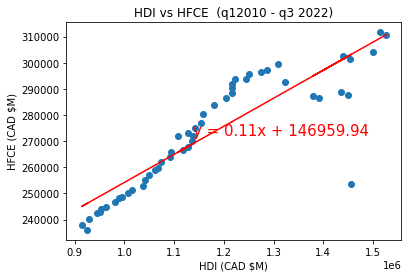

None


In [14]:
# # HDI vs HFCE

x_values = combined_df["Household Disposable Income"]    # YOUR CODE HERE
y_values = combined_df["Household final consumption expenditure"]
plt.ylabel("HFCE (CAD $M)")
plt.title(f'HDI vs HFCE  (q12010 - q3 2022)')
# Save the figure
# plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))
# print(linear_reg_plot(x_values))

## Q1 2017 - Q3 2022

In [15]:
fullp_df = combined_df.iloc[28:51,]

fullp_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
28,Q12017,280224,24967,22232,2735,10118,5213,3375,..,1530,...,0,152,0,73284,180760,180160,165600,14560,600,-107476
29,Q22017,283993,25269,22556,2713,10139,5282,3339,..,1518,...,0,288,0,76620,173856,173300,164192,9108,556,-97236
30,Q32017,286533,25372,22626,2746,10129,5320,3301,..,1508,...,0,296,0,93700,177880,177472,166536,10936,408,-84180
31,Q42017,288474,25503,22694,2809,10203,5409,3291,..,1503,...,0,312,0,92968,188724,187944,171304,16640,780,-95756
32,Q12018,290484,25738,22892,2846,10272,5450,3292,0,1530,...,0,328,0,79488,194312,193568,172228,21340,744,-114824
33,Q22018,292029,26038,23148,2890,10189,5386,3249,0,1554,...,0,508,0,65856,190812,190812,171784,19028,0,-124956
34,Q32018,293819,26309,23359,2950,10296,5454,3228,0,1614,...,0,508,0,62948,184988,185152,171108,14044,-164,-122040
35,Q42018,293903,26062,23147,2915,10207,5352,3176,206,1473,...,0,516,0,77520,183544,184060,172816,11244,-516,-106024
36,Q12019,295558,25959,23009,2950,10251,5458,3131,204,1458,...,0,528,0,76508,185504,184840,169352,15488,664,-108996
37,Q22019,296306,26099,23102,2997,10257,5460,3127,301,1369,...,0,400,0,92268,182136,181692,172756,8936,444,-89868


The r-squared is: 0.2801398583376236


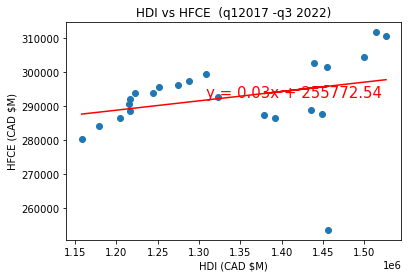

None


In [16]:
# # HDI vs HFCE

x_values = fullp_df["Household Disposable Income"]    # YOUR CODE HERE
y_values = fullp_df["Household final consumption expenditure"]
plt.ylabel("HFCE (CAD $M)")
plt.title(f'HDI vs HFCE  (q12017 -q3 2022)')
# Save the figure
# plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))
# print(linear_reg_plot(x_values))


The r-squared is: 0.7648244757540468


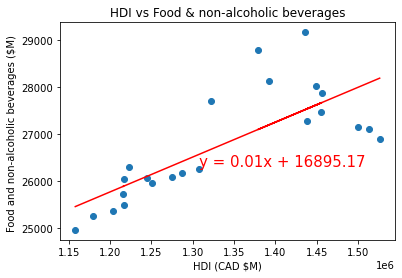

None


In [20]:
# HDI vs Food & non-alcoholic beverages
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food and non-alcoholic beverages']


#label the y axis
y_label = "Food and non-alcoholic beverages"
plt.ylabel("Food and non-alcoholic beverages ($M) ")
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.7084103645266422


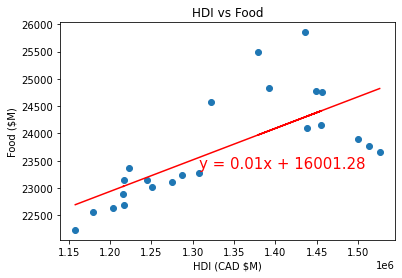

None


In [24]:
# HDI vs Food
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food']

#label the y axis
plt.ylabel("Food ($M)")
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.07768895290300448


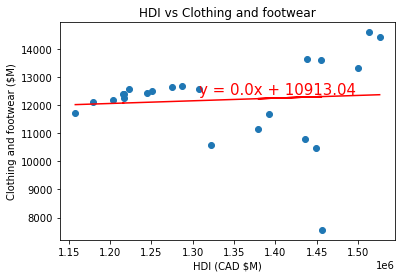

None


In [25]:
# HDI vs Clothing and footwear
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Clothing and footwear']

#label the y axis
plt.ylabel("Clothing and footwear ($M)")
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.7062385057664411


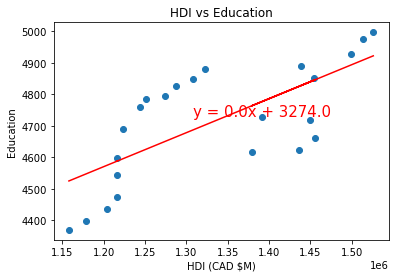

None


In [26]:
# HDI vs Education
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Education']

#label the y axis
plt.ylabel("Education") 

#give the title
plt.title(f'HDI vs Education')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: -0.7494681458002532


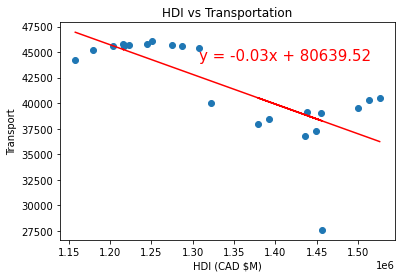

None


In [27]:
# HDI vs Transportation
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Transport']

#label the y axis
plt.ylabel("Transport") 

#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: -0.4775197994974712


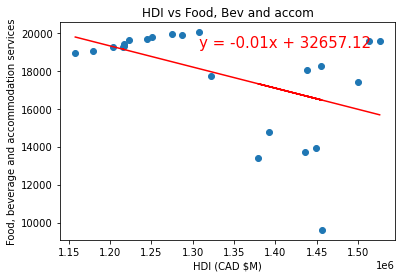

None


In [28]:
# HDI vs Food, Bev and accom
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food, beverage and accommodation services']

#label the y axis
plt.ylabel( "Food, beverage and accommodation services")

#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: -0.33868383051302836


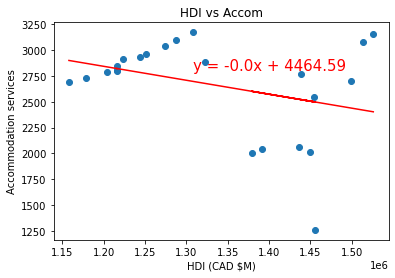

None


In [29]:
# HDI vs Accom
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Accommodation services']

#label the y axis
plt.ylabel ("Accommodation services")

#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.25305157753167346


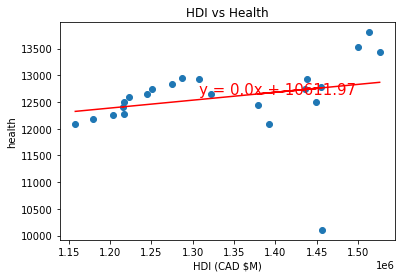

None


In [30]:
# HDI vs Health
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Health']

#label the y axis
plt.ylabel("health")

#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

## Before COVID19        (Q1 2017 - Q4 2019)

In [31]:
before_df = combined_df.iloc[28:40,]

before_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
28,Q12017,280224,24967,22232,2735,10118,5213,3375,..,1530,...,0,152,0,73284,180760,180160,165600,14560,600,-107476
29,Q22017,283993,25269,22556,2713,10139,5282,3339,..,1518,...,0,288,0,76620,173856,173300,164192,9108,556,-97236
30,Q32017,286533,25372,22626,2746,10129,5320,3301,..,1508,...,0,296,0,93700,177880,177472,166536,10936,408,-84180
31,Q42017,288474,25503,22694,2809,10203,5409,3291,..,1503,...,0,312,0,92968,188724,187944,171304,16640,780,-95756
32,Q12018,290484,25738,22892,2846,10272,5450,3292,0,1530,...,0,328,0,79488,194312,193568,172228,21340,744,-114824
33,Q22018,292029,26038,23148,2890,10189,5386,3249,0,1554,...,0,508,0,65856,190812,190812,171784,19028,0,-124956
34,Q32018,293819,26309,23359,2950,10296,5454,3228,0,1614,...,0,508,0,62948,184988,185152,171108,14044,-164,-122040
35,Q42018,293903,26062,23147,2915,10207,5352,3176,206,1473,...,0,516,0,77520,183544,184060,172816,11244,-516,-106024
36,Q12019,295558,25959,23009,2950,10251,5458,3131,204,1458,...,0,528,0,76508,185504,184840,169352,15488,664,-108996
37,Q22019,296306,26099,23102,2997,10257,5460,3127,301,1369,...,0,400,0,92268,182136,181692,172756,8936,444,-89868


The r-squared is: 0.9514159395860565


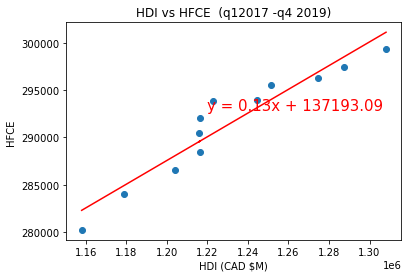

None


In [32]:
# HDI vs HFCE

x_values = before_df["Household Disposable Income"]    # YOUR CODE HERE
y_values = before_df["Household final consumption expenditure"]
plt.ylabel("HFCE ")
plt.title(f'HDI vs HFCE  (q12017 -q4 2019)')
# Save the figure
# plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))
# print(linear_reg_plot(x_values))

The r-squared is: 0.8260462000500982


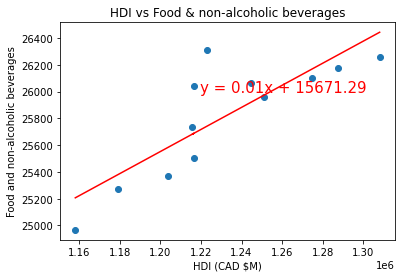

None


In [33]:
# HDI vs Food & non-alcoholic beverages
x_values = before_df['Household Disposable Income']
y_values = before_df['Food and non-alcoholic beverages']


#label the y axis
plt.ylabel("Food and non-alcoholic beverages")
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.7943503528782477


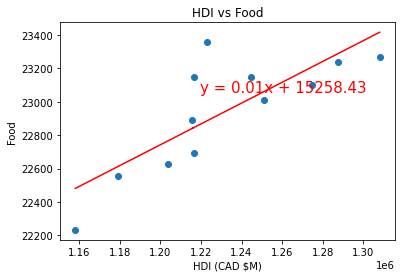

None


In [34]:
# HDI vs Food
x_values = before_df['Household Disposable Income']
y_values = before_df['Food']

#label the y axis
plt.ylabel("Food")
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.8710322521530908


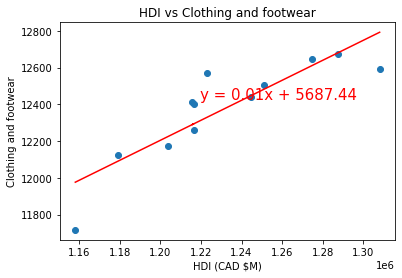

None


In [35]:
# HDI vs Clothing and footwear
x_values = before_df['Household Disposable Income']
y_values = before_df['Clothing and footwear']


#label the y axis
plt.ylabel("Clothing and footwear")
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.9306493624331337


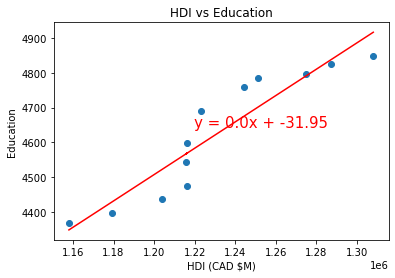

None


In [36]:
# HDI vs Education
x_values = before_df['Household Disposable Income']
y_values = before_df['Education']

#label the y axis
plt.ylabel("Education")

#give the title
plt.title(f'HDI vs Education')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.5309836167137794


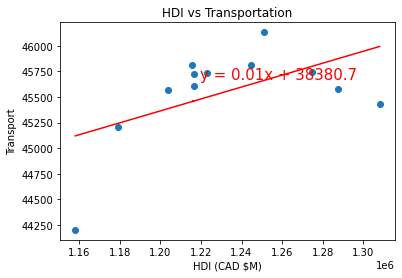

None


In [37]:
# HDI vs Transportati
x_values = before_df['Household Disposable Income']
y_values = before_df['Transport']

#label the y axis
plt.ylabel("Transport")

#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.9668150338448869


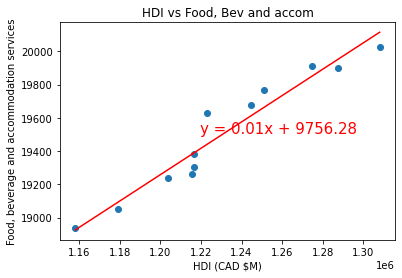

None


In [38]:
# HDI vs Food, Bev and accom
x_values = before_df['Household Disposable Income']
y_values = before_df['Food, beverage and accommodation services']

#label the y axis
plt.ylabel( "Food, beverage and accommodation services")

#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.9835545128052022


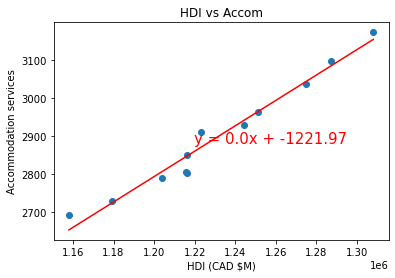

None


In [39]:
# HDI vs Accom
x_values = before_df['Household Disposable Income']
y_values = before_df['Accommodation services']

#label the y axis
plt.ylabel( "Accommodation services")

#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.9591773489466867


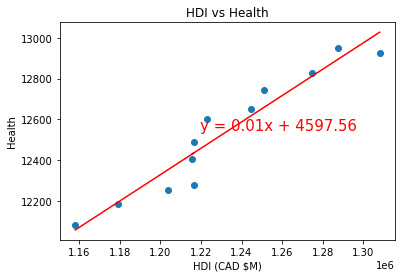

None


In [40]:
# HDI vs Health
x_values = before_df['Household Disposable Income']
y_values = before_df['Health']

#label the y axis
plt.ylabel("Health")

#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

## COVID-19 (Q1 2020- Q3 2022)

In [41]:
covid_df = combined_df.iloc[40:51,]

# dataframe
covid_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
40,Q12020,292702,27696,24577,3119,10702,5805,3137,656,1104,...,0,420,0,140544,194544,193804,178980,14824,740,-54000
41,Q22020,253559,27869,24762,3107,10782,5771,3175,765,1071,...,0,184,0,453184,162236,163076,153296,9780,-840,290948
42,Q32020,286409,28121,24836,3285,11008,5793,3150,1023,1042,...,0,172,0,249360,208012,210696,204768,5928,-2684,41348
43,Q42020,287279,28775,25493,3282,11098,5762,3074,1205,1057,...,0,144,0,221356,224312,225044,212804,12240,-732,-2956
44,Q12021,288913,29159,25853,3306,11260,5913,3052,1243,1052,...,0,140,0,271580,248780,251408,234880,16528,-2628,22800
45,Q22021,287525,28019,24774,3245,11206,5825,2986,1360,1035,...,0,164,0,278036,246160,247596,239468,8128,-1436,31876
46,Q32021,301564,27462,24162,3300,11344,5775,2940,1625,1004,...,0,172,0,212224,227004,230968,226672,4296,-3964,-14780
47,Q42021,302515,27286,24095,3191,11396,5832,2921,1671,972,...,0,212,0,172672,252668,253604,245600,8004,-936,-79996
48,Q12022,304266,27158,23903,3255,11183,5674,2907,1664,938,...,0,296,0,213616,267832,266680,254164,12516,1152,-54216
49,Q22022,311671,27113,23767,3346,11250,5696,2800,1852,902,...,0,336,0,161324,243428,239000,231196,7804,4428,-82104


The r-squared is: 0.3768773167453953


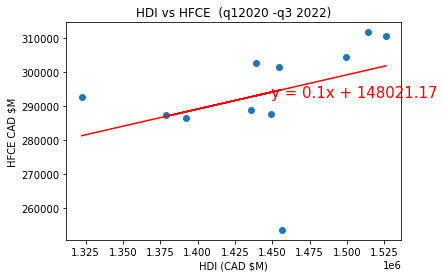

None


In [43]:
# HDI vs HFCE

# #save as a png to the neighboring output_data folder
# # plt.savefig("data/HDI vs HFCE.png")

x_values = covid_df["Household Disposable Income"]    # YOUR CODE HERE
y_values = covid_df["Household final consumption expenditure"]
plt.ylabel("HFCE CAD $M")
plt.title(f'HDI vs HFCE  (q12020 -q3 2022)')
# Save the figure
# plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))
# print(linear_reg_plot(x_values))

The r-squared is: -0.5473175247285896


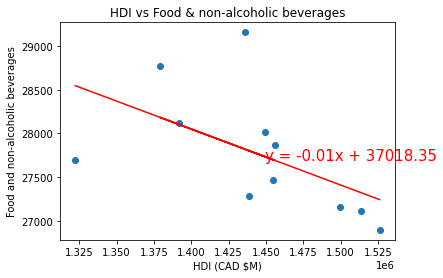

None


In [44]:
# HDI vs Food & non-alcoholic beverages
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food and non-alcoholic beverages']


#label the y axis
plt.ylabel("Food and non-alcoholic beverages")

#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: -0.5910189857920323


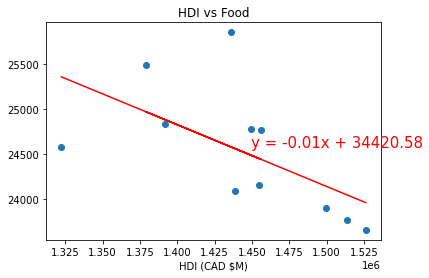

None


In [47]:
# HDI vs Food
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food']


#label the y axis
y_label = "Food"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.50384789080686


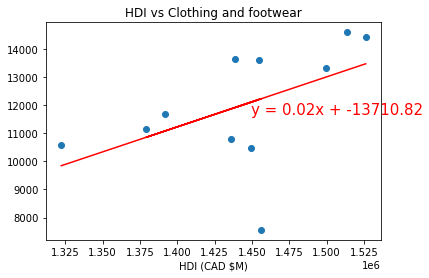

None


In [48]:
# HDI vs Clothing and footwear
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Clothing and footwear']


#label the y axis
y_label = "Clothing and footwear"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-squared is: 0.4773298396671004


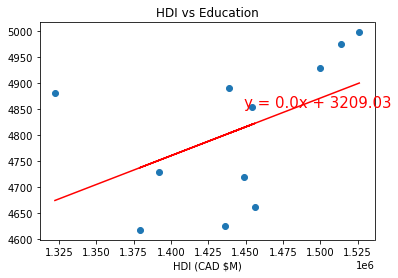

None


In [49]:
# HDI vs Education
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Education']

#label the y axis
y_label = "Household Disposable Income"
#give the title
plt.title(f'HDI vs Education')
x_label = "HDI"
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.02954483749082457


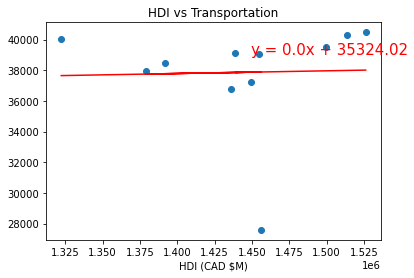

None


In [50]:
# HDI vs Transportation
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Transport']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.31107336782721556


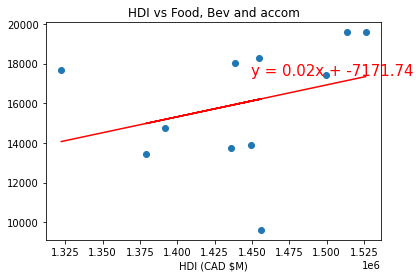

None


In [51]:
# HDI vs Food, Bev and accom
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food, beverage and accommodation services']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.2785735480338017


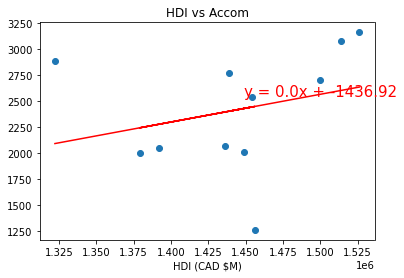

None


In [52]:
# HDI vs Accom
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Accommodation services']

#label the y axis
y_label = "Accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder

The r-squared is: 0.34344662859608704


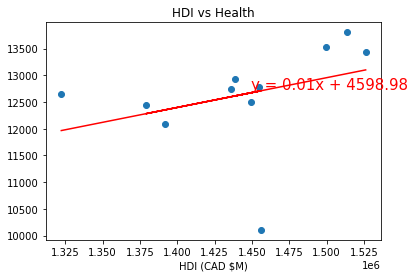

None


In [54]:
# HDI vs Health
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Health']

#label the y axis
y_label = "Health"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
print(linear_reg_plot(x_values,y_values))

# #save as a png to the data folder